In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Function to create heatmap data array
def create_heatmap_data(inv_heat_map):
    times = sorted(set(k[0]+1 for k in inv_heat_map.keys()))
    intensities = sorted(set(k[1] for k in inv_heat_map.keys()))
    heatmap_data = np.full((len(intensities), len(times)), np.nan)
    
    for (t, i), value in inv_heat_map.items():
        heatmap_data[i, t] = value

    # Mask out the cells with value -1
    masked_heatmap_data = np.ma.masked_where(heatmap_data == -1, heatmap_data)
    return masked_heatmap_data, times, intensities

In [12]:
# Example of multiple inventory heat maps
heat_maps = [
    {(0, 0): 8500.0, (1, 0): 17000.0, (2, 0): 25500.0, (3, 0): 34000.0, (4, 0): 41485.204081632655, (5, 0): 48229.3510297347, (6, 0): 51856.22729265399, (7, 0): 53054.99018290643, (8, 0): 54047.48639411667, (0, 1): -1, (1, 1): 17000.0, (2, 1): 25500.0, (3, 1): 34000.0, (4, 1): 42028.09971048893, (5, 1): 48521.01130693905, (6, 1): 54518.299503978844, (7, 1): 54560.22891581935, (8, 1): 54743.36390479976, (0, 2): -1, (1, 2): 17000.0, (2, 2): 25500.0, (3, 2): 34000.0, (4, 2): 42500.0, (5, 2): 50239.92602160065, (6, 2): 56835.364050580254, (7, 2): 56115.644534469306, (8, 2): 55751.1889020671, (0, 3): -1, (1, 3): -1, (2, 3): 25500.0, (3, 3): 34000.0, (4, 3): 42500.0, (5, 3): 50565.637402969995, (6, 3): 58258.69241486421, (7, 3): 57570.85614919632, (8, 3): 57128.24211767255, (0, 4): -1, (1, 4): -1, (2, 4): 25500.0, (3, 4): 34000.0, (4, 4): 42500.0, (5, 4): 50882.15226647152, (6, 4): 58463.23258204089, (7, 4): 58528.78370073612, (8, 4): 57902.101348756245, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 42500.0, (5, 5): 51000.0, (6, 5): 59500.0, (7, 5): 58910.57783224511, (8, 5): 59153.04296032321},
    {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 13830.374149066429, (4, 0): 32327.833212902442, (5, 0): 46805.073559265176, (6, 0): 56517.35518633132, (7, 0): 63915.40455835687, (8, 0): 69777.02680851954, (0, 1): -1, (1, 1): 0.0, (2, 1): 0.0, (3, 1): 13873.368215256416, (4, 1): 40735.318287524395, (5, 1): 61729.24447400527, (6, 1): 75089.75665526156, (7, 1): 75891.28841710702, (8, 1): 76498.76203926648, (0, 2): -1, (1, 2): 0.0, (2, 2): 0.0, (3, 2): 14305.73057415218, (4, 2): 45394.25304776576, (5, 2): 71819.13527278334, (6, 2): 92736.3708430891, (7, 2): 86253.91733025317, (8, 2): 84458.49267956102, (0, 3): -1, (1, 3): -1, (2, 3): 0.0, (3, 3): 21980.863977361187, (4, 3): 48767.82760108431, (5, 3): 76211.42631775304, (6, 3): 99612.3391161692, (7, 3): 96968.81171871326, (8, 3): 94139.90239863122, (0, 4): -1, (1, 4): -1, (2, 4): 0.0, (3, 4): 25686.141259436095, (4, 4): 54991.48097878007, (5, 4): 81048.74135585842, (6, 4): 105929.40799543993, (7, 4): 103500.07432598811, (8, 4): 99257.92019755575, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 68000.0, (5, 5): 96118.05597231358, (6, 5): 116458.6593284715, (7, 5): 114221.7100628848, (8, 5): 111081.86569886775},
    {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 0.0, (5, 0): 0.0, (6, 0): 51987.53031927297, (7, 0): 60528.905298200945, (8, 0): 67501.64593705077, (0, 1): -1, (1, 1): 0.0, (2, 1): 0.0, (3, 1): 0.0, (4, 1): 0.0, (5, 1): 0.0, (6, 1): 73145.9924536143, (7, 1): 74465.12997698612, (8, 1): 74996.95607731381, (0, 2): -1, (1, 2): 0.0, (2, 2): 0.0, (3, 2): 0.0, (4, 2): 0.0, (5, 2): 0.0, (6, 2): 94571.93423894368, (7, 2): 86419.5924531748, (8, 2): 84468.02224542758, (0, 3): -1, (1, 3): -1, (2, 3): 0.0, (3, 3): 0.0, (4, 3): 0.0, (5, 3): 2142.328187852591, (6, 3): 100664.57050689314, (7, 3): 98900.63775246896, (8, 3): 95696.54403953733, (0, 4): -1, (1, 4): -1, (2, 4): 0.0, (3, 4): 0.0, (4, 4): 0.0, (5, 4): 35270.41623094366, (6, 4): 119269.70352565638, (7, 4): 110939.83126364267, (8, 4): 105280.63038903222, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 0.0, (5, 5): 56472.716447093764, (6, 5): 165073.50166599423, (7, 5): 147616.8063699433, (8, 5): 132989.1180486261}
    # Add more heat maps as needed
]

# Titles for each subplot
titles = [
    "Flow capacity = 0.25",
    "Flow capacity = 1",
    "Flow capacity = 4"
    # Add titles corresponding to each heat map
]

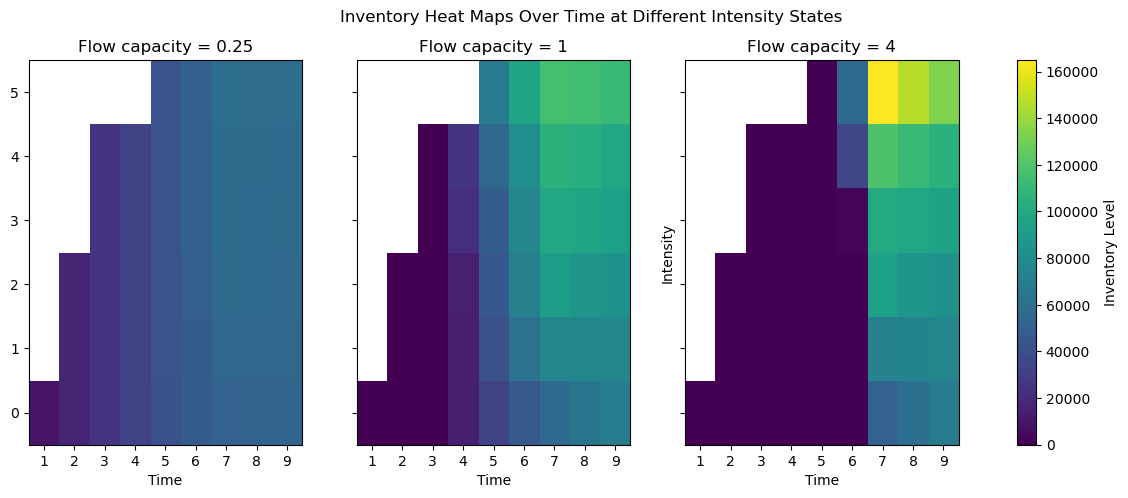

<Figure size 640x480 with 0 Axes>

In [13]:
# Gather all inventory levels to find global min and max
all_values = []
for inv_heat_map in heat_maps:
    all_values.extend([v for v in inv_heat_map.values() if v != -1])

global_min = min(all_values)
global_max = max(all_values)

# Plot each heatmap with consistent color scale
fig, axes = plt.subplots(1, len(heat_maps), figsize=(15, 5), sharey=True)

for ax, inv_heat_map, title in zip(axes, heat_maps, titles):
    heatmap_data, times, intensities = create_heatmap_data(inv_heat_map)
    cmap = plt.cm.viridis
    cmap.set_bad(color='white')
    cax = ax.imshow(heatmap_data, cmap=cmap, aspect='auto', origin='lower', vmin=global_min, vmax=global_max)
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_xticks(range(len(times)))
    ax.set_xticklabels(times)
    ax.set_yticks(range(len(intensities)))
    ax.set_yticklabels(intensities)

fig.colorbar(cax, ax=axes, orientation='vertical', label='Inventory Level')
plt.ylabel('Intensity')
plt.suptitle('Inventory Heat Maps Over Time at Different Intensity States')
plt.show()
plt.savefig("inv_heat_fc-D.png")

In [14]:
# Example of multiple inventory heat maps
heat_maps = [
    {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 13133.816306765844, (5, 0): 24159.871422910524, (6, 0): 35115.78451420811, (7, 0): 46627.086828177795, (8, 0): 52863.29258723569, (0, 1): -1, (1, 1): 0.0, (2, 1): 0.0, (3, 1): 0.0, (4, 1): 14049.911918002217, (5, 1): 38193.95120570788, (6, 1): 49979.59469381656, (7, 1): 58397.42734582549, (8, 1): 62405.30403341684, (0, 2): -1, (1, 2): 0.0, (2, 2): 0.0, (3, 2): 0.0, (4, 2): 15218.544293907084, (5, 2): 42345.86572281996, (6, 2): 65219.53388129895, (7, 2): 81613.23845752681, (8, 2): 76273.05273256608, (0, 3): -1, (1, 3): -1, (2, 3): 0.0, (3, 3): 12057.875566262652, (4, 3): 26617.332863044965, (5, 3): 48565.28307359918, (6, 3): 72346.62562048282, (7, 3): 96320.87848629843, (8, 3): 92390.0017555124, (0, 4): -1, (1, 4): -1, (2, 4): 0.0, (3, 4): 12064.516129032258, (4, 4): 37648.103659042026, (5, 4): 58812.54135604428, (6, 4): 83116.30873718673, (7, 4): 106660.49123734818, (8, 4): 99940.29746175437, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 68000.0, (5, 5): 86707.06029995024, (6, 5): 92996.34721491428, (7, 5): 124512.52645099329, (8, 5): 119943.66388406143},
    {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 13830.374149066429, (4, 0): 32327.833212902442, (5, 0): 46805.073559265176, (6, 0): 56517.35518633132, (7, 0): 63915.40455835687, (8, 0): 69777.02680851954, (0, 1): -1, (1, 1): 0.0, (2, 1): 0.0, (3, 1): 13873.368215256416, (4, 1): 40735.318287524395, (5, 1): 61729.24447400527, (6, 1): 75089.75665526156, (7, 1): 75891.28841710702, (8, 1): 76498.76203926648, (0, 2): -1, (1, 2): 0.0, (2, 2): 0.0, (3, 2): 14305.73057415218, (4, 2): 45394.25304776576, (5, 2): 71819.13527278334, (6, 2): 92736.3708430891, (7, 2): 86253.91733025317, (8, 2): 84458.49267956102, (0, 3): -1, (1, 3): -1, (2, 3): 0.0, (3, 3): 21980.863977361187, (4, 3): 48767.82760108431, (5, 3): 76211.42631775304, (6, 3): 99612.3391161692, (7, 3): 96968.81171871326, (8, 3): 94139.90239863122, (0, 4): -1, (1, 4): -1, (2, 4): 0.0, (3, 4): 25686.141259436095, (4, 4): 54991.48097878007, (5, 4): 81048.74135585842, (6, 4): 105929.40799543993, (7, 4): 103500.07432598811, (8, 4): 99257.92019755575, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 68000.0, (5, 5): 96118.05597231358, (6, 5): 116458.6593284715, (7, 5): 114221.7100628848, (8, 5): 111081.86569886775},
    {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 14361.990868663986, (3, 0): 35559.1995246403, (4, 0): 55296.786717228344, (5, 0): 64742.042049347874, (6, 0): 73124.24648362395, (7, 0): 78219.69070607549, (8, 0): 81478.53777440015, (0, 1): -1, (1, 1): 0.0, (2, 1): 13561.053152182016, (3, 1): 40608.5250172703, (4, 1): 68357.6940100583, (5, 1): 88721.58382234554, (6, 1): 85923.68036404482, (7, 1): 85190.40389791189, (8, 1): 86095.17172940486, (0, 2): -1, (1, 2): 0.0, (2, 2): 13209.916008127228, (3, 2): 46074.54546604072, (4, 2): 73057.08836037084, (5, 2): 97610.12675658763, (6, 2): 94584.66888461263, (7, 2): 91927.44766802716, (8, 2): 90476.0867462292, (0, 3): -1, (1, 3): -1, (2, 3): 15646.842463709398, (3, 3): 46796.771287420685, (4, 3): 78827.18713871768, (5, 3): 105828.3012852451, (6, 3): 101974.8935363209, (7, 3): 99881.29147053909, (8, 3): 98260.1707572556, (0, 4): -1, (1, 4): -1, (2, 4): 13663.207686883074, (3, 4): 44067.06936478418, (4, 4): 80991.07412336761, (5, 4): 109537.92459822343, (6, 4): 107855.96705437891, (7, 4): 105340.58616371632, (8, 4): 101636.63906889036, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 95704.95959170548, (5, 5): 122778.71969377939, (6, 5): 110490.26305839427, (7, 5): 114581.48668764482, (8, 5): 113074.11581757478},
    {(0, 0): 0.0, (1, 0): 13591.50617498175, (2, 0): 37082.18081811935, (3, 0): 68310.88332551839, (4, 0): 79028.46812315118, (5, 0): 83294.55182674604, (6, 0): 85972.00627805077, (7, 0): 88304.09644217945, (8, 0): 90315.28002306295, (0, 1): -1, (1, 1): 14197.00416430902, (2, 1): 39515.69729005515, (3, 1): 72426.13021285419, (4, 1): 95014.23123956153, (5, 1): 91659.92619580067, (6, 1): 91945.73417688349, (7, 1): 91837.8228476464, (8, 1): 92896.63292173836, (0, 2): -1, (1, 2): 13659.189380096988, (2, 2): 41153.59689524727, (3, 2): 73998.26209258451, (4, 2): 101369.62551128087, (5, 2): 99127.99016996368, (6, 2): 96874.7856742281, (7, 2): 95467.59065681936, (8, 2): 94428.15787823635, (0, 3): -1, (1, 3): -1, (2, 3): 47512.14157449847, (3, 3): 76201.55748138633, (4, 3): 107903.78009195157, (5, 3): 105244.14330721981, (6, 3): 102304.92636741347, (7, 3): 100983.38047650555, (8, 3): 99796.32913345998, (0, 4): -1, (1, 4): -1, (2, 4): 34000.0, (3, 4): 73413.96350171555, (4, 4): 109614.09692715113, (5, 4): 107919.12570513132, (6, 4): 106677.8464220243, (7, 4): 104418.5568266567, (8, 4): 101915.46413375287, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 129704.95959170623, (5, 5): 119884.79813833491, (6, 5): 110914.48814763446, (7, 5): 113580.43886546003, (8, 5): 111497.71291667134}
    # Add more heat maps as needed
]

# Titles for each subplot
titles = [
    "Safety threshold = 1",
    "Safety threshold = 2",
    "Safety threshold = 3",
    "Safety threshold = 4"
    # Add titles corresponding to each heat map
]

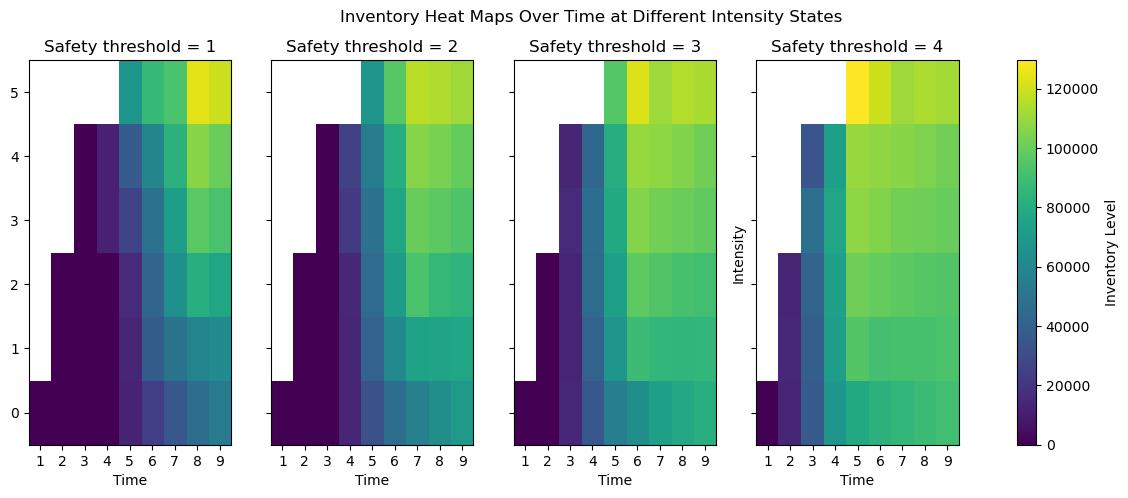

<Figure size 640x480 with 0 Axes>

In [15]:
# Gather all inventory levels to find global min and max
all_values = []
for inv_heat_map in heat_maps:
    all_values.extend([v for v in inv_heat_map.values() if v != -1])

global_min = min(all_values)
global_max = max(all_values)

# Plot each heatmap with consistent color scale
fig, axes = plt.subplots(1, len(heat_maps), figsize=(15, 5), sharey=True)

for ax, inv_heat_map, title in zip(axes, heat_maps, titles):
    heatmap_data, times, intensities = create_heatmap_data(inv_heat_map)
    cmap = plt.cm.viridis
    cmap.set_bad(color='white')
    cax = ax.imshow(heatmap_data, cmap=cmap, aspect='auto', origin='lower', vmin=global_min, vmax=global_max)
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_xticks(range(len(times)))
    ax.set_xticklabels(times)
    ax.set_yticks(range(len(intensities)))
    ax.set_yticklabels(intensities)

fig.colorbar(cax, ax=axes, orientation='vertical', label='Inventory Level')
plt.ylabel('Intensity')
plt.suptitle('Inventory Heat Maps Over Time at Different Intensity States')
plt.show()
plt.savefig("inv_heat_st-D.png")

In [16]:
# Example of multiple inventory heat maps
heat_maps = [
    {(0, 0): 8500.0, (1, 0): 17000.0, (2, 0): 25500.0, (3, 0): 34000.0, (4, 0): 42500.0, (5, 0): 50626.33895665869, (6, 0): 55478.310755169376, (7, 0): 56634.92364810764, (8, 0): 59310.93221497588, (9, 0): 61458.0456004415, (10, 0): 46126.01254593759, (0, 1): -1, (1, 1): 17000.0, (2, 1): 25500.0, (3, 1): 34000.0, (4, 1): 42500.0, (5, 1): 51000.0, (6, 1): 58094.35854952286, (7, 1): 62929.76610992764, (8, 1): 65327.51687571368, (9, 1): 66399.93121794522, (10, 1): 45075.281947684074, (0, 2): -1, (1, 2): 17000.0, (2, 2): 25500.0, (3, 2): 34000.0, (4, 2): 42500.0, (5, 2): 51000.0, (6, 2): 59489.093437900985, (7, 2): 66210.56947696701, (8, 2): 71729.78261984221, (9, 2): 69927.78378418907, (10, 2): 48849.134357656854, (0, 3): -1, (1, 3): -1, (2, 3): 25500.0, (3, 3): 34000.0, (4, 3): 42500.0, (5, 3): 51000.0, (6, 3): 59500.0, (7, 3): 66917.54992673676, (8, 3): 73729.23593287313, (9, 3): 72874.56579707703, (10, 3): 52089.18822917679, (0, 4): -1, (1, 4): -1, (2, 4): 25500.0, (3, 4): 34000.0, (4, 4): 42500.0, (5, 4): 51000.0, (6, 4): 59500.0, (7, 4): 68000.0, (8, 4): 75940.30208558457, (9, 4): 75034.3223442396, (10, 4): 54160.88936984238, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 42500.0, (5, 5): 51000.0, (6, 5): 59500.0, (7, 5): 68000.0, (8, 5): 76500.0, (9, 5): 76089.48629150912, (10, 5): 56055.27247633284},
    {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 0.0, (5, 0): 4378.827260449507, (6, 0): 21872.307689520676, (7, 0): 38207.28049001889, (8, 0): 46782.63537700923, (9, 0): 53104.98541349113, (10, 0): 42347.656854156674, (0, 1): -1, (1, 1): 0.0, (2, 1): 0.0, (3, 1): 0.0, (4, 1): 0.0, (5, 1): 4378.827260524896, (6, 1): 36424.20205681089, (7, 1): 53836.89547085421, (8, 1): 62369.24352242489, (9, 1): 67138.70474421735, (10, 1): 45545.587120996825, (0, 2): -1, (1, 2): 0.0, (2, 2): 0.0, (3, 2): 0.0, (4, 2): 0.0, (5, 2): 4378.827260533394, (6, 2): 38378.827260659455, (7, 2): 66663.98530559451, (8, 2): 86275.48136889224, (9, 2): 80030.87866502356, (10, 2): 54161.63321511066, (0, 3): -1, (1, 3): -1, (2, 3): 0.0, (3, 3): 0.0, (4, 3): 0.0, (5, 3): 6537.114977341746, (6, 3): 39433.298190514135, (7, 3): 70550.1955428582, (8, 3): 95784.63549710877, (9, 3): 92071.08888616029, (10, 3): 62762.001604799996, (0, 4): -1, (1, 4): -1, (2, 4): 0.0, (3, 4): 0.0, (4, 4): 8798.324908921533, (5, 4): 37741.73996562266, (6, 4): 53969.07729320403, (7, 4): 80027.17985383065, (8, 4): 102971.00619514468, (9, 4): 100097.31845174864, (10, 4): 69379.58940391526, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 34000.0, (5, 5): 39216.08656074205, (6, 5): 70430.09782186022, (7, 5): 93178.42906873667, (8, 5): 112422.84990409408, (9, 5): 107901.36939897192, (10, 5): 74559.20708380062},
    {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 0.0, (5, 0): 0.0, (6, 0): 0.0, (7, 0): 0.0, (8, 0): 35127.20009635811, (9, 0): 44761.17055437922, (10, 0): 36927.41722606059, (0, 1): -1, (1, 1): 0.0, (2, 1): 0.0, (3, 1): 0.0, (4, 1): 0.0, (5, 1): 0.0, (6, 1): 0.0, (7, 1): 0.0, (8, 1): 58519.76147675939, (9, 1): 62874.53712552239, (10, 1): 42475.01485128073, (0, 2): -1, (1, 2): 0.0, (2, 2): 0.0, (3, 2): 0.0, (4, 2): 0.0, (5, 2): 0.0, (6, 2): 0.0, (7, 2): 0.0, (8, 2): 87172.23206310309, (9, 2): 78994.30908494852, (10, 2): 52576.843016632134, (0, 3): -1, (1, 3): -1, (2, 3): 0.0, (3, 3): 0.0, (4, 3): 0.0, (5, 3): 0.0, (6, 3): 0.0, (7, 3): 0.0, (8, 3): 95778.15896685094, (9, 3): 93244.84049547373, (10, 3): 62884.66710843482, (0, 4): -1, (1, 4): -1, (2, 4): 0.0, (3, 4): 0.0, (4, 4): 0.0, (5, 4): 0.0, (6, 4): 0.0, (7, 4): 23434.327447865347, (8, 4): 111266.08868581305, (9, 4): 105743.31474490058, (10, 4): 71644.21564230774, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 0.0, (5, 5): 0.0, (6, 5): 0.0, (7, 5): 30216.917594552997, (8, 5): 152550.1222417034, (9, 5): 132618.32573582928, (10, 5): 87995.31112560957}
    # Add more heat maps as needed
]

# Titles for each subplot
titles = [
    "Flow capacity = 0.25",
    "Flow capacity = 1",
    "Flow capacity = 4"
    # Add titles corresponding to each heat map
]

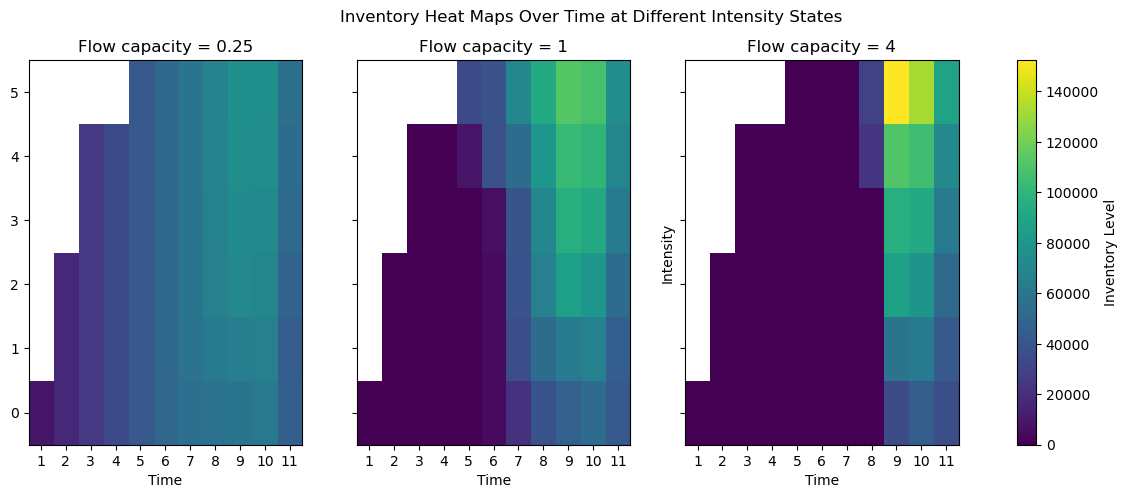

<Figure size 640x480 with 0 Axes>

In [17]:
# Gather all inventory levels to find global min and max
all_values = []
for inv_heat_map in heat_maps:
    all_values.extend([v for v in inv_heat_map.values() if v != -1])

global_min = min(all_values)
global_max = max(all_values)

# Plot each heatmap with consistent color scale
fig, axes = plt.subplots(1, len(heat_maps), figsize=(15, 5), sharey=True)

for ax, inv_heat_map, title in zip(axes, heat_maps, titles):
    heatmap_data, times, intensities = create_heatmap_data(inv_heat_map)
    cmap = plt.cm.viridis
    cmap.set_bad(color='white')
    cax = ax.imshow(heatmap_data, cmap=cmap, aspect='auto', origin='lower', vmin=global_min, vmax=global_max)
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_xticks(range(len(times)))
    ax.set_xticklabels(times)
    ax.set_yticks(range(len(intensities)))
    ax.set_yticklabels(intensities)

fig.colorbar(cax, ax=axes, orientation='vertical', label='Inventory Level')
plt.ylabel('Intensity')
plt.suptitle('Inventory Heat Maps Over Time at Different Intensity States')
plt.show()
plt.savefig("inv_heat_fc-R.png")

In [ ]:
# Example of multiple inventory heat maps
heat_maps = [
    {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 0.0, (5, 0): 0.0, (6, 0): 3636.219128613868, (7, 0): 16315.23741465106, (8, 0): 25652.218444671016, (9, 0): 33330.04946012325, (10, 0): 29712.863709779915, (0, 1): -1, (1, 1): 0.0, (2, 1): 0.0, (3, 1): 0.0, (4, 1): 0.0, (5, 1): 0.0, (6, 1): 4378.840413921957, (7, 1): 29696.910221323316, (8, 1): 40502.60394444838, (9, 1): 54361.743939536536, (10, 1): 36060.2605080448, (0, 2): -1, (1, 2): 0.0, (2, 2): 0.0, (3, 2): 0.0, (4, 2): 0.0, (5, 2): 0.0, (6, 2): 4399.960052995316, (7, 2): 36599.52051117622, (8, 2): 60247.23637449909, (9, 2): 69721.52025714473, (10, 2): 47203.06910622491, (0, 3): -1, (1, 3): -1, (2, 3): 0.0, (3, 3): 0.0, (4, 3): 0.0, (5, 3): 3160.4139081627445, (6, 3): 24936.66956330016, (7, 3): 46311.825340528674, (8, 3): 65869.64879298983, (9, 3): 88935.95459186567, (10, 3): 57953.013057057084, (0, 4): -1, (1, 4): -1, (2, 4): 0.0, (3, 4): 0.0, (4, 4): 0.0, (5, 4): 17425.011825435635, (6, 4): 42277.361109488345, (7, 4): 63743.179223836065, (8, 4): 87617.68018359203, (9, 4): 99290.74671456724, (10, 4): 66309.51383762673, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 5792.569114238533, (5, 5): 34000.0, (6, 5): 57654.40276618999, (7, 5): 75882.45719555458, (8, 5): 98574.86384120544, (9, 5): 117580.05160124433, (10, 5): 79991.61356356615},
    {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 13830.374149066429, (4, 0): 32327.833212902442, (5, 0): 46805.073559265176, (6, 0): 56517.35518633132, (7, 0): 63915.40455835687, (8, 0): 69777.02680851954, (0, 1): -1, (1, 1): 0.0, (2, 1): 0.0, (3, 1): 13873.368215256416, (4, 1): 40735.318287524395, (5, 1): 61729.24447400527, (6, 1): 75089.75665526156, (7, 1): 75891.28841710702, (8, 1): 76498.76203926648, (0, 2): -1, (1, 2): 0.0, (2, 2): 0.0, (3, 2): 14305.73057415218, (4, 2): 45394.25304776576, (5, 2): 71819.13527278334, (6, 2): 92736.3708430891, (7, 2): 86253.91733025317, (8, 2): 84458.49267956102, (0, 3): -1, (1, 3): -1, (2, 3): 0.0, (3, 3): 21980.863977361187, (4, 3): 48767.82760108431, (5, 3): 76211.42631775304, (6, 3): 99612.3391161692, (7, 3): 96968.81171871326, (8, 3): 94139.90239863122, (0, 4): -1, (1, 4): -1, (2, 4): 0.0, (3, 4): 25686.141259436095, (4, 4): 54991.48097878007, (5, 4): 81048.74135585842, (6, 4): 105929.40799543993, (7, 4): 103500.07432598811, (8, 4): 99257.92019755575, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 68000.0, (5, 5): 96118.05597231358, (6, 5): 116458.6593284715, (7, 5): 114221.7100628848, (8, 5): 111081.86569886775},
    {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 14361.990868663986, (3, 0): 35559.1995246403, (4, 0): 55296.786717228344, (5, 0): 64742.042049347874, (6, 0): 73124.24648362395, (7, 0): 78219.69070607549, (8, 0): 81478.53777440015, (0, 1): -1, (1, 1): 0.0, (2, 1): 13561.053152182016, (3, 1): 40608.5250172703, (4, 1): 68357.6940100583, (5, 1): 88721.58382234554, (6, 1): 85923.68036404482, (7, 1): 85190.40389791189, (8, 1): 86095.17172940486, (0, 2): -1, (1, 2): 0.0, (2, 2): 13209.916008127228, (3, 2): 46074.54546604072, (4, 2): 73057.08836037084, (5, 2): 97610.12675658763, (6, 2): 94584.66888461263, (7, 2): 91927.44766802716, (8, 2): 90476.0867462292, (0, 3): -1, (1, 3): -1, (2, 3): 15646.842463709398, (3, 3): 46796.771287420685, (4, 3): 78827.18713871768, (5, 3): 105828.3012852451, (6, 3): 101974.8935363209, (7, 3): 99881.29147053909, (8, 3): 98260.1707572556, (0, 4): -1, (1, 4): -1, (2, 4): 13663.207686883074, (3, 4): 44067.06936478418, (4, 4): 80991.07412336761, (5, 4): 109537.92459822343, (6, 4): 107855.96705437891, (7, 4): 105340.58616371632, (8, 4): 101636.63906889036, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 95704.95959170548, (5, 5): 122778.71969377939, (6, 5): 110490.26305839427, (7, 5): 114581.48668764482, (8, 5): 113074.11581757478},
    {(0, 0): 0.0, (1, 0): 13591.50617498175, (2, 0): 37082.18081811935, (3, 0): 68310.88332551839, (4, 0): 79028.46812315118, (5, 0): 83294.55182674604, (6, 0): 85972.00627805077, (7, 0): 88304.09644217945, (8, 0): 90315.28002306295, (0, 1): -1, (1, 1): 14197.00416430902, (2, 1): 39515.69729005515, (3, 1): 72426.13021285419, (4, 1): 95014.23123956153, (5, 1): 91659.92619580067, (6, 1): 91945.73417688349, (7, 1): 91837.8228476464, (8, 1): 92896.63292173836, (0, 2): -1, (1, 2): 13659.189380096988, (2, 2): 41153.59689524727, (3, 2): 73998.26209258451, (4, 2): 101369.62551128087, (5, 2): 99127.99016996368, (6, 2): 96874.7856742281, (7, 2): 95467.59065681936, (8, 2): 94428.15787823635, (0, 3): -1, (1, 3): -1, (2, 3): 47512.14157449847, (3, 3): 76201.55748138633, (4, 3): 107903.78009195157, (5, 3): 105244.14330721981, (6, 3): 102304.92636741347, (7, 3): 100983.38047650555, (8, 3): 99796.32913345998, (0, 4): -1, (1, 4): -1, (2, 4): 34000.0, (3, 4): 73413.96350171555, (4, 4): 109614.09692715113, (5, 4): 107919.12570513132, (6, 4): 106677.8464220243, (7, 4): 104418.5568266567, (8, 4): 101915.46413375287, (0, 5): -1, (1, 5): -1, (2, 5): -1, (3, 5): -1, (4, 5): 129704.95959170623, (5, 5): 119884.79813833491, (6, 5): 110914.48814763446, (7, 5): 113580.43886546003, (8, 5): 111497.71291667134}
    # Add more heat maps as needed
]

# Titles for each subplot
titles = [
    "Safety threshold = 1",
    "Safety threshold = 2",
    "Safety threshold = 3",
    "Safety threshold = 4"
    # Add titles corresponding to each heat map
]